['x_1_dot', 'G*m_2/(x_1**2 - 2.0*x_1*x_2 + x_2**2)', 'x_2_dot', '-G*m_1/(x_1**2 - 2.0*x_1*x_2 + x_2**2)']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


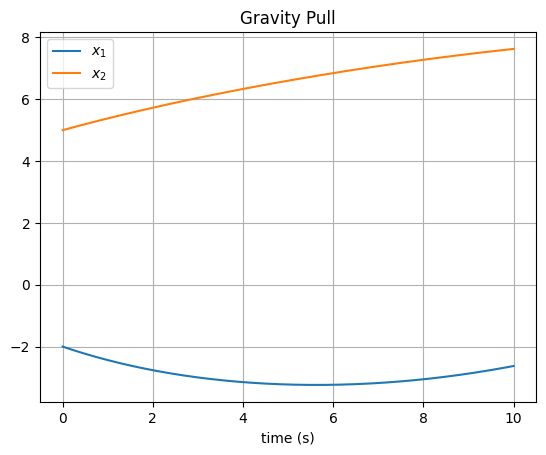

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Simulate gravity ####
# assign constants
G = 6.6743 * 10**-11
m_1 = 9**11
m_2 = 10**11


# initial conditions
x_1_0=-2
x_2_0=5
x0 = np.array([x_1_0, -0.5, x_2_0, 0.4])


%store -r ODE
print(ODE)
# our system of differential equations
# see "derivation.ipynb" for details
def Gravity_Sim_ODE(t, y):
    x_1 = y[0]
    x_1_dot = y[1]
    x_2 = y[2]
    x_2_dot = y[3]
    ODEs=[]
    for i in range(4):
        ODEs.append(eval(ODE[i]))

    return (ODEs)


# solve the ODE, evaluate at 30 fps
sol = solve_ivp(Gravity_Sim_ODE, [0, 10], x0, 
    t_eval=np.linspace(0,10,10*30))

# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
t = sol.t

# plot theta and ell over time
plt.plot(t, x_1, label="$x_1$")
plt.plot(t, x_2, label="$x_2$")
plt.legend()
plt.grid()
plt.xlabel("time (s)")
plt.title('Gravity Pull')
plt.show()

In [17]:
# Animate the spring pendulum
import matplotlib.animation as animation
from ffmpeg import FFmpeg
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle
# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
t = sol.t

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-10, 40)
ax.set_ylim(-2, 2)

s_1= m_1/max([m_1,m_2])*1.5
s_2= m_2/max([m_1,m_2])*1.5


circle1 = ax.add_patch(Circle((x_1_0,0), s_1, fc='b'))
circle2 = ax.add_patch(Circle((x_2_0,0), s_2, fc='r'))

plt.show
plt.savefig('gravity_sim.png')
#animate each frame "i"
def animate(i):

    px_1 = x_1[i]
    px_2 = x_2[i]
    circle1.set_center((px_1, 0))
    circle2.set_center((px_2, 0))
    

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))

# Convert animation to a GIF
ani.save('gravity_sim.gif', writer='pillow', fps=30)

ModuleNotFoundError: No module named 'ffmpeg'